In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl


In [2]:
movie = pd.read_csv("C:/Users/kshit/Downloads/IMDb.csv", encoding="latin-1")

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
movie.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
movie=movie.drop_duplicates()

In [7]:
movie.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [15]:
# Create a new DataFrame for the genre data
genre_data = movie[['Genre']].copy()

# Drop rows with missing values in the 'Genre' column
genre_data.dropna(subset=['Genre'], inplace=True)

# Combine all genres into a single string, separated by commas
all_genres = ",".join(genre_data['Genre'].tolist())

# Split the combined string to get a list of all genres
genre_list = all_genres.split(",")

# Use a set to collect unique genres after stripping spaces
unique_genres = set(genre.strip() for genre in genre_list)

# Convert the set of unique genres back to a list
unique_genres = list(unique_genres)

# Print the unique genre names
print(unique_genres)

['Sport', 'Mystery', 'Western', 'Animation', 'Romance', 'Sci-Fi', 'Family', 'Adventure', 'Reality-TV', 'Comedy', 'Music', 'Thriller', 'Documentary', 'History', 'Musical', 'Drama', 'Horror', 'Fantasy', 'Crime', 'Action', 'Short', 'News', 'War', 'Biography']


In [19]:
# Split the 'Genre' column by commas and create a list of genres for each row
movie['Genre'] = movie['Genre'].str.split(', ')

# Create a new DataFrame to store the expanded genre data
genre_data = movie.explode('Genre')

# Calculate the count of movies for each genre
genre_counts = genre_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Calculate the mean rating for each genre
genre_mean_ratings = genre_data.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']

# Merge the counts and mean ratings into a single DataFrame
genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')

# Display the resulting DataFrame
print(genre_stats)

          Genre  Count  Mean Rating
0         Drama   7242     5.998558
1        Action   3542     5.430365
2       Romance   2449     5.750533
3        Comedy   2029     5.737290
4      Thriller   1711     5.536187
5         Crime   1321     5.727813
6        Family    943     6.195173
7       Musical    589     6.156627
8     Adventure    541     5.816839
9        Horror    524     4.785000
10      Mystery    513     5.801892
11      Fantasy    458     5.819512
12  Documentary    383     7.613287
13    Biography    208     6.819718
14      History    207     6.804688
15    Animation    125     5.956164
16        Music     90     6.137705
17        Sport     70     6.494118
18       Sci-Fi     58     5.272973
19          War     47     6.041176
20         News      9     7.250000
21      Western      5     5.566667
22   Reality-TV      3          NaN
23        Short      1          NaN


In [27]:
movie.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)


In [25]:
movie['Duration'] = movie['Duration'].str.replace(r'\D', '', regex=True).astype(float)

In [28]:
movie['Year'] = movie['Year'].str.replace(r'\D', '', regex=True).astype(int)

In [29]:
movie['Votes'] = movie['Votes'].str.replace(',', '', regex=True).astype(int)

In [30]:
median_duration = movie['Duration'].median()

# Fill missing values in the 'Duration' column with the median value
movie['Duration'].fillna(median_duration, inplace=True)

In [31]:
movie.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

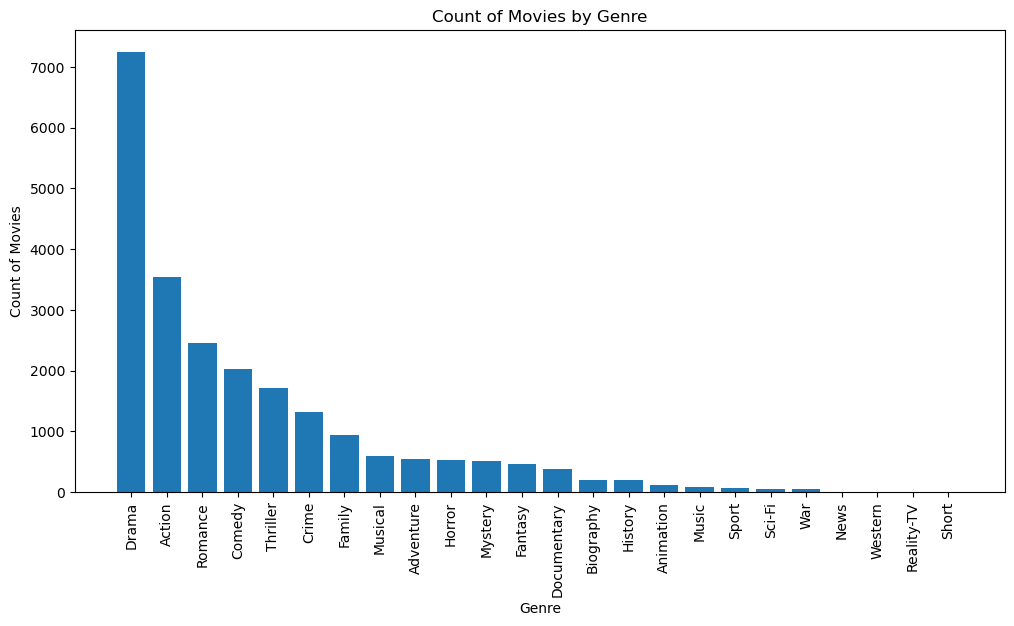

In [34]:
# Sort the DataFrame by count in descending order for better visualization
genre_stats = genre_stats.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genre'], genre_stats['Count'])
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [36]:
#lowest rated movie
movie.loc[(movie['Rating'].min()==movie['Rating']) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,2020,133.0,"[Action, Drama]",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [37]:
#Most Frequent Pairs
acts = movie[['Actor 1', 'Actor 2', 'Actor 3']].value_counts().sort_values(ascending=False).head(10)
acts

Actor 1           Actor 2          Actor 3        
Shatrughan Sinha  Reena Roy        Danny Denzongpa    4
Dharmendra        Sunny Deol       Bobby Deol         3
Dibakar Banerjee  Karan Johar      Anurag Kashyap     3
Anil Kapoor       Sridevi          Anupam Kher        3
Govinda           Karisma Kapoor   Shakti Kapoor      3
Ashok Kumar       Meena Kumari     Pradeep Kumar      3
Jeetendra         Rekha            Rishi Kapoor       3
Mala Sinha        Manoj Kumar      Shashikala         2
Rajesh Khanna     Sharmila Tagore  Sujit Kumar        2
Manoj Kumar       Hema Malini      Prem Nath          2
dtype: int64

In [38]:
acts1 = movie['Actor 1'].value_counts().sort_values(ascending=False).head(10)
acts1

Jeetendra             140
Dharmendra            134
Mithun Chakraborty    130
Ashok Kumar           125
Rajesh Khanna         118
Amitabh Bachchan      116
Dev Anand              90
Shashi Kapoor          88
Akshay Kumar           82
Sanjay Dutt            73
Name: Actor 1, dtype: int64

In [39]:
acts2 = movie['Actor 2'].value_counts().sort_values(ascending=False).head(10)
acts2

Rekha                 79
Hema Malini           71
Mithun Chakraborty    59
Dharmendra            55
Mala Sinha            43
Shabana Azmi          42
Reena Roy             42
Juhi Chawla           41
Jaya Prada            40
Sharmila Tagore       39
Name: Actor 2, dtype: int64

In [40]:
acts3 = movie['Actor 3'].value_counts().sort_values(ascending=False).head(10)
acts3

Pran                  75
Anupam Kher           55
Shakti Kapoor         46
Prem Chopra           44
Mithun Chakraborty    42
Shatrughan Sinha      41
Raj Babbar            39
Amrish Puri           38
Paresh Rawal          36
Aruna Irani           35
Name: Actor 3, dtype: int64

In [41]:
top_25_rated_movies_of_actor=movie[(movie['Rating']>=7)]['Actor 1'].head(25)

In [43]:
top_25_actor=movie.groupby(top_25_rated_movies_of_actor)['Rating'].mean()
top_25_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Anupam Kher            8.1
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Mumtaz Ahmed           7.3
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Shashi Kapoor          7.2
Shravani Abhang        8.0
Srishti Gautam         7.8
Trivikram Mattoo       7.9
Name: Rating, dtype: float64

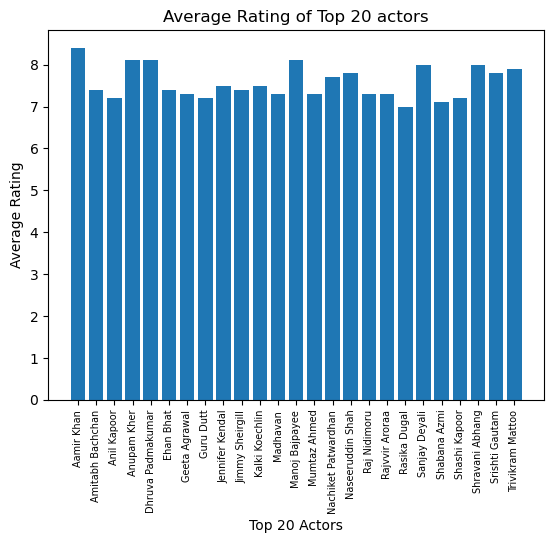

In [46]:
plt.bar(top_25_actor.index,top_25_actor.values)
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation="vertical", fontsize=7)
plt.show()

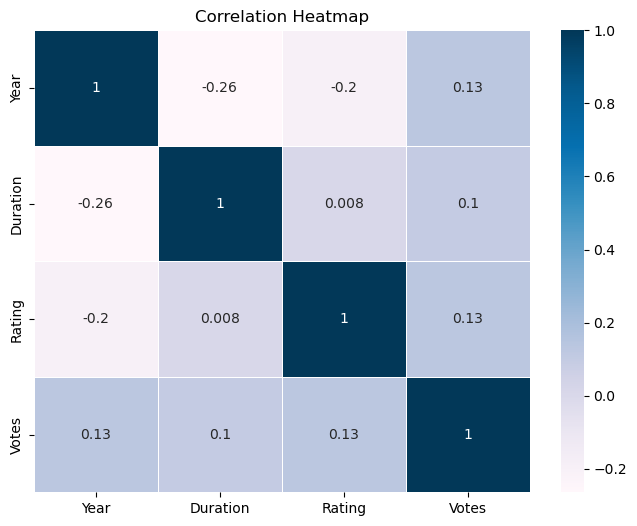

In [50]:
correlation_matrix = movie[['Year', 'Duration', 'Rating', 'Votes']].corr()

plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="PuBu", linewidths=.4)

plt.title("Correlation Heatmap")
plt.show()

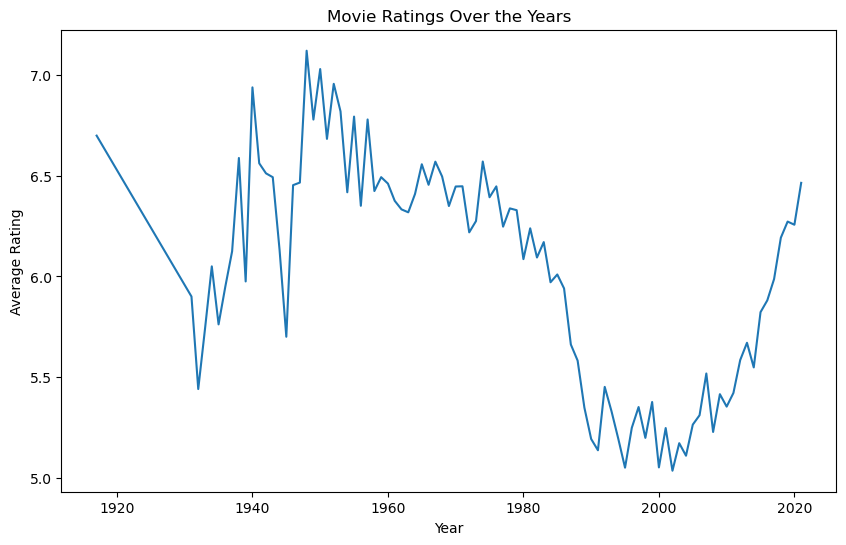

In [51]:
# Make sure 'Year' and 'Rating' columns are in the correct data types (int and float)
movie['Year'] = movie['Year'].astype(int)
movie['Rating'] = movie['Rating'].astype(float)

# Group data by year and calculate the mean rating for each year
ratings_by_year = movie.groupby('Year')['Rating'].mean()

# Create a time series plot for movie ratings over the years
plt.figure(figsize=(10, 6))
ratings_by_year.plot()
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

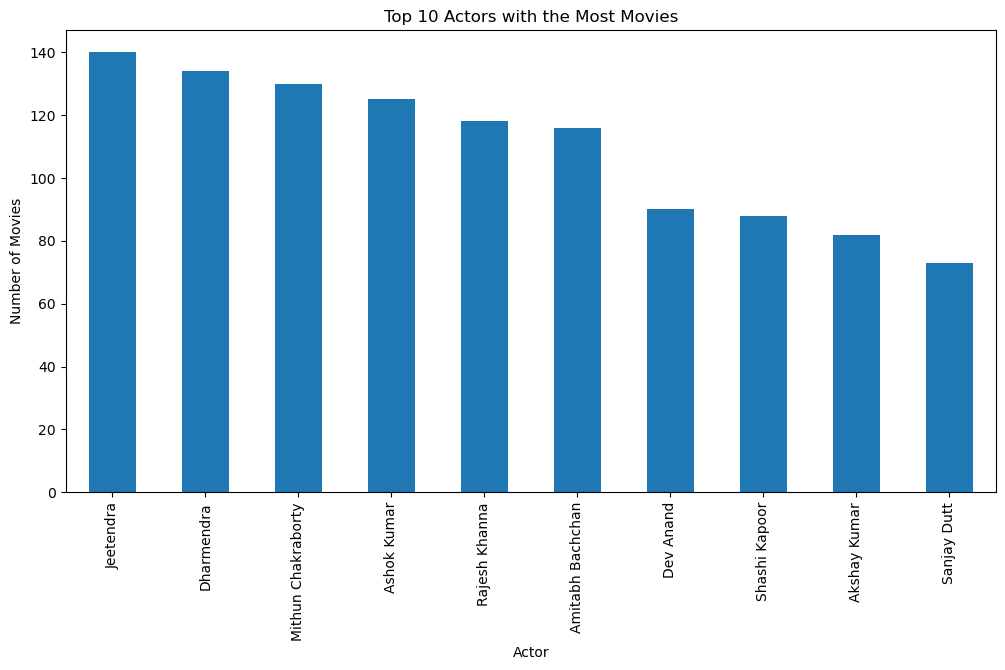

In [53]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each actor, sort in descending order, and select the top 10
top_actors = movie['Actor 1'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 actors with the most movies
top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()

In [54]:
datamodel = movie[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

In [55]:
director_mean_rating = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Director_encoded'] = director_mean_rating

actor1_mean_rating = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = datamodel.groupby('Actor 3')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = actor3_mean_rating

C:\Users\kshit\AppData\Local\Temp\ipykernel_11568\3293793641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datamodel['Director_encoded'] = director_mean_rating


In [56]:
X = datamodel[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [58]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [61]:
print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print()

Logistic Regression Model Performance: 
Mean squared error:  0.4597971803723771
Mean absolute error:  0.5039903224422292
R2 score:  0.7469573883592335

